## 単一オミクス解析 クラスター RNA / METH / CNV

In [1]:
import numpy as np
import pandas as pd

RNA = np.load("data/RNA_z.npy")      # shape = (n_features, n_samples)
METH = np.load("data/METH_z.npy")
CNV = np.load("data/CNV_z.npy")

In [2]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

def plot_sil_elbow(arr):
    X = arr.T  # shape=(サンプル数, 遺伝子数)

    # 2≦K≦10 で評価
    sil_scores = []
    sse = []
    K_range = range(2,11)
    for K in K_range:
        km = KMeans(n_clusters=K, random_state=0)
        labels = km.fit_predict(X)
        sil_scores.append(silhouette_score(X, labels))
        sse.append(km.inertia_)

    # プロット
    fig, ax = plt.subplots(1,2, figsize=(10,4))
    ax[0].plot(K_range, sil_scores, marker='o')
    ax[0].set_xlabel('K'); ax[0].set_ylabel('Silhouette Score')
    ax[1].plot(K_range, sse, marker='o')
    ax[1].set_xlabel('K'); ax[1].set_ylabel('SSE (Elbow)')
    plt.tight_layout()
    plt.show()

In [3]:
rna_z = pd.read_csv("data/RNA_z.csv", index_col="gene_id")
rna_z

,TCGA-05-4384,TCGA-05-4390,TCGA-05-4396,TCGA-05-4405,TCGA-05-4410,TCGA-05-4415,TCGA-05-4417,TCGA-05-4424,TCGA-05-4425,TCGA-05-4427,...,TCGA-NJ-A4YG,TCGA-NJ-A4YI,TCGA-NJ-A4YP,TCGA-NJ-A4YQ,TCGA-NJ-A55A,TCGA-NJ-A55O,TCGA-NJ-A55R,TCGA-NJ-A7XG,TCGA-O1-A52J,TCGA-S2-AA1A
gene_id,,,,,,,,,,,,,,,,,,,,,
ENSG00000000003.15,-0.779494,-0.344009,-0.885666,-0.286874,-0.671523,-0.202296,-0.352557,0.133765,-0.691317,-0.748002,...,-0.628784,-1.085863,0.485123,-0.677821,-0.029992,-0.997687,0.165707,0.927356,-0.155508,0.746504
ENSG00000000005.6,-0.083600,-0.083600,-0.083600,-0.083600,-0.078239,-0.083600,-0.075558,-0.083600,-0.083600,0.146927,...,-0.064836,0.203219,-0.029989,-0.083600,-0.083600,-0.083600,-0.075558,-0.083600,-0.083600,-0.078239
ENSG00000000419.13,-0.755281,-0.215090,-0.922180,-1.155328,-1.295472,-0.808791,-1.077612,-0.579464,-0.277518,-0.060932,...,-0.653358,-0.739993,2.154616,-0.547613,-0.951483,-0.575642,1.362166,-0.090235,0.105967,-0.597301
ENSG00000000457.14,0.049078,-0.868108,-0.637764,-0.206394,-0.424173,-0.449301,-0.711055,-0.288061,-0.742466,-0.889048,...,-0.093316,-0.507934,2.668712,0.271046,-0.629388,0.176814,2.465591,0.065830,0.009292,-0.072376
ENSG00000000460.17,-0.677329,0.382607,-0.930346,-0.308061,-0.697844,1.172431,-0.759389,-0.003756,-0.646557,-0.000337,...,-0.574754,-0.663652,2.403325,-0.263612,-0.855125,-0.523467,0.539888,-0.489276,-0.106331,-0.803837
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSG00000288675.1,-0.625897,-0.550975,-0.326208,0.572857,-0.401131,-1.225274,-0.326208,-0.625897,-0.401131,-0.326208,...,-0.326208,-0.401131,3.195132,-0.775741,0.198247,0.423013,3.120210,0.572857,1.097312,1.471923
N_ambiguous,-0.837330,-0.758252,-1.190651,-0.961970,-0.963779,-0.064720,-0.764147,-0.347297,-0.652480,-0.665661,...,-0.284992,-0.746463,3.119636,-0.099405,-1.261395,-0.468392,3.519381,0.077422,0.089143,-0.253874
N_multimapping,-0.527939,-0.654775,-0.905902,-0.787752,-0.668393,-0.292596,-0.438691,-0.462516,-0.687819,-0.646252,...,-0.426518,-0.843076,1.856819,-0.013161,-1.046536,-0.386691,2.205458,-0.229386,-0.498575,0.336232


- up/downでK=2でクラスタリングを行う

## 関数化

In [ ]:
from sklearn.cluster import KMeans
from scipy.stats import f_oneway
from statsmodels.stats.multitest import multipletests


def cluster_makedf(K, arr, df_z):
    # rnaのクラスターを基準にするので、rna_zにだけクラスタリングを行う
    if df_z == rna_z:
        # クラスタリング
        X = arr.T  # shape=(サンプル数, 遺伝子数)
        km = KMeans(n_clusters=K, random_state=0)
        cluster_labels = km.fit_predict(X)  # 各サンプルに 0,1,2 のラベル

        # DataFrame に結果を付与
        sample_clusters = pd.Series(cluster_labels,
                                    index=df_z.columns,
                                    name='cluster')
        print(f"cluster: {sample_clusters.value_counts()}")

        # 各クラスタのサンプルインデックス
        clusters = [df_z.columns[cluster_labels == k] for k in range(K)]

        # clusters は各クラスタのサンプルリスト
        valid_genes = []
        for g in df_z.index:
            # 各クラスタごとの標準偏差を計算
            sds = [df_z.loc[g, grp].std() for grp in clusters]
            if all(sd > 0 for sd in sds):  # 分散が0よりも上
                valid_genes.append(g)

        # df_z を valid_genes のみに絞る
        df_filt = df_z.loc[valid_genes]
        print(f"df_filt(valid_genes): {df_filt}")

        pvals = []
        for g in df_filt.index:
            groups = [df_filt.loc[g, grp] for grp in clusters]
            _, p = f_oneway(*groups)
            pvals.append(p)

        reject, qvals, _, _ = multipletests(pvals, method='fdr_bh')

        idx_name = df_filt.index.name  # インデックス名を取得
        if idx_name == "gene_id":
            df_de = pd.DataFrame({
                'gene_id': df_filt.index,
                'pvalue': pvals,
                'qvalue': qvals,
                'reject_H0': reject
            }).set_index('gene_id')
        else:
            df_de = pd.DataFrame({
                'gene': df_filt.index,
                'pvalue': pvals,
                'qvalue': qvals,
                'reject_H0': reject
            }).set_index('gene')

        print(f"df_de: {df_de.head()}")


    # 各クラスタの平均発現を計算
    means = pd.DataFrame({
        f'cluster_{k}_mean':
        df_filt.loc[:, clusters[k]].mean(axis=1)
        for k in range(K)
    })
    means['max_mean'] = means.max(axis=1)
    means['min_mean'] = means.min(axis=1)
    means['deltaZ'] = means['max_mean'] - means['min_mean']
    print(f"means: {means.head()}")

    # df_de に結合
    df_de = df_de.join(means[['deltaZ']])
    print(f"df_de: {df_de.head()}")

    for k in range(K):
        # クラスタ k のサンプル名リスト
        samples_k = list(clusters[k])
        # その他全サンプル
        samples_rest = [s for s in df_filt.columns if s not in samples_k]

        # クラスタ k の平均 vs その他全体の平均
        mean_k = df_filt[samples_k].mean(axis=1)
        mean_rest = df_filt[samples_rest].mean(axis=1)

        df_de[f"signed_delta_cluster{k+1}"] = mean_k - mean_rest

    print(f"df_de(add average of cluster): {df_de.head()}")

    return df_de, km

In [36]:
from sklearn.cluster import KMeans
from scipy.stats import f_oneway
from statsmodels.stats.multitest import multipletests
import pandas as pd

def cluster_makedf(K, arr, df_z,
                sample_clusters=None,
                clusters=None):
    """
    - K: クラスタ数
    - arr: df_z に対応する numpy 配列（行=遺伝子/probe, 列=サンプル）
    - df_z: gene×sample の Z スコア DataFrame
    - sample_clusters: 事前に計算済みのサンプル→クラスタ Series（RNA 以外のときに渡す）
    - clusters: 事前に計算済みの各クラスタのサンプルリスト（RNA 以外のときに渡す）

    戻り値:
    - df_de: 差次解析結果の DataFrame（index=gene/probe, 列=[pvalue,qvalue,deltaZ,signed_delta…]）
    - sample_clusters, clusters: RNA のときは新規に計算、METH/CNV のときはそのまま返す
    """
    # --- 1) RNA のときだけクラスタリングを実行 ---
    if sample_clusters is None or clusters is None:
        X = arr.T  # サンプル×遺伝子
        km = KMeans(n_clusters=K, random_state=0)
        labels = km.fit_predict(X)

        sample_clusters = pd.Series(labels,
                                    index=df_z.columns,
                                    name="cluster")
        clusters = [
            df_z.columns[labels == k].tolist()
            for k in range(K)
        ]
        print(f"[RNA] cluster counts:\n{sample_clusters.value_counts()}")
    else:
        # METH/CNV のときは KMeans も km も再計算しない
        km = None

    # --- 2) 有意検定（ANOVA） & 多重検定補正 ---
    valid = []
    for g in df_z.index:
        sds = [df_z.loc[g, grp].std() for grp in clusters]
        if all(sd > 0 for sd in sds):
            valid.append(g)
    df_filt = df_z.loc[valid]

    pvals = []
    for g in df_filt.index:
        groups = [df_filt.loc[g, grp] for grp in clusters]
        _, p = f_oneway(*groups)
        pvals.append(p)
    reject, qvals, _, _ = multipletests(pvals, method="fdr_bh")

    # インデックス名に応じて列名を変える
    idx = df_filt.index.name or "gene"
    df_de = pd.DataFrame({
        idx      : df_filt.index,
        "pvalue" : pvals,
        "qvalue" : qvals,
        "reject_H0": reject
    }).set_index(idx)

    # --- 3) クラスタ平均・deltaZ・signed_delta の計算 ---
    means = pd.DataFrame({
        f"cluster{k}_mean": df_filt[clusters[k]].mean(axis=1)
        for k in range(K)
    })
    means["max_mean"] = means.max(axis=1)
    means["min_mean"] = means.min(axis=1)
    means["deltaZ"]   = means["max_mean"] - means["min_mean"]

    # Cluster k vs rest の signed_delta
    for k in range(K):
        rest = [s for s in df_filt.columns if s not in clusters[k]]
        means[f"signed_delta_cluster{k+1}"] = (
            df_filt[clusters[k]].mean(axis=1)
            - df_filt[rest].mean(axis=1)
        )

    df_de = df_de.join(means)
    print(f"df_de:\n{df_de}")

    return df_de, sample_clusters, clusters, km


In [ ]:
import gzip

emap = {}
with gzip.open("dataset/gencode.v36.chr_patch_hapl_scaff.annotation.gtf.gz","rt") as f:
    for line in f:
        if line.startswith("#"): continue
        cols = line.split("\t")
        if cols[2]!="gene": continue
        attrs = {kv.split(" ")[0]: kv.split(" ")[1].strip('";')
                for kv in cols[8].split("; ") if kv}
        emap[attrs["gene_id"]] = attrs["gene_name"]
emap

{'ENSG00000223972.5': 'DDX11L1',
 'ENSG00000227232.5': 'WASH7P',
 'ENSG00000278267.1': 'MIR6859-1',
 'ENSG00000243485.5': 'MIR1302-2HG',
 'ENSG00000284332.1': 'MIR1302-2',
 'ENSG00000237613.2': 'FAM138A',
 'ENSG00000268020.3': 'OR4G4P',
 'ENSG00000240361.2': 'OR4G11P',
 'ENSG00000186092.6': 'OR4F5',
 'ENSG00000238009.6': 'AL627309.1',
 'ENSG00000239945.1': 'AL627309.3',
 'ENSG00000233750.3': 'CICP27',
 'ENSG00000268903.1': 'AL627309.6',
 'ENSG00000269981.1': 'AL627309.7',
 'ENSG00000239906.1': 'AL627309.2',
 'ENSG00000241860.7': 'AL627309.5',
 'ENSG00000222623.1': 'RNU6-1100P',
 'ENSG00000241599.1': 'AL627309.4',
 'ENSG00000279928.2': 'FO538757.1',
 'ENSG00000279457.4': 'WASH9P',
 'ENSG00000273874.1': 'MIR6859-2',
 'ENSG00000228463.10': 'AP006222.1',
 'ENSG00000286448.1': 'AP006222.2',
 'ENSG00000236679.2': 'RPL23AP24',
 'ENSG00000236601.2': 'AL732372.1',
 'ENSG00000237094.12': 'AL732372.2',
 'ENSG00000269732.1': 'WBP1LP7',
 'ENSG00000284733.1': 'OR4F29',
 'ENSG00000233653.3': 'CICP7',

In [6]:
def up_down_genes(df_de, upordown, cluster_column, abs_point):

    # クラスタ
    if upordown == "UP":
        sig = df_de[(df_de[cluster_column] > 0)
                    & (df_de['qvalue'] < 0.05) &
                    (df_de['signed_delta_cluster1'].abs() > abs_point)]

    else:
        sig = df_de[(df_de[cluster_column] < 0)
                    & (df_de['qvalue'] < 0.05) &
                    (df_de['signed_delta_cluster1'].abs() > abs_point)]

    print(f"クラスタ {cluster_column} {upordown} 遺伝子数: {len(sig)}")
    print(sig.index.name)
    up_down_index = sig.index.tolist()

    idx_name = sig.index.name  # インデックス名を取得
    if idx_name == "gene_id":
        # ID をシンボルに変換
        up_down_symbols = [emap[gid] for gid in up_down_index if gid in emap]

    else:
        up_down_symbols = sig.index.tolist()

    print("シンボル化後 件数:", len(up_down_symbols))
    return up_down_symbols, cluster_column, upordown, abs_point

In [7]:
import gseapy as gp
import matplotlib.pyplot as plt

def plot_ORA(up_down_symbols, cluster_column, upordown, abs_point, top_n=10):
    ora = gp.enrichr(
        gene_list=up_down_symbols,  # HGNC シンボル
        gene_sets=[
            'GO_Biological_Process_2025',  # 利用可能なライブラリ名
            'KEGG_2021_Human'
        ],
        organism='Human',
        cutoff=0.05,  # adj p<0.05 を結果に残す
        outdir='ora_cluster1',  # 結果の出力先
        no_plot=True  # プロットは後で自分で描く
    )
    print('ora.results.head()', ora.results.head())

    # ora_res.results を df とする
    df = ora.results.copy()
    # Overlap を数値にパース
    # 例: "12/200" → 12, 200
    df[['k','K']] = df['Overlap'] \
        .str.split('/', expand=True) \
        .astype(int)

    # Gene_ratio を計算（k/K）
    df['Gene_ratio'] = df['k'] / df['K']

    # df を使ってプロット
    print(df[['Term', 'Overlap', 'Gene_ratio']].head())

    df = df.sort_values('Adjusted P-value').head(top_n)
    # Gene_ratio は gseapy が gene_ratio 列で出してくれる
    terms = df['Term']
    ratios = df['Odds Ratio'].astype(float)
    pv = df['Adjusted P-value'].astype(float)

    # -log10(pvalue) を計算
    neglogpv = -np.log10(pv)

    # vmin, vmax を安全に設定(カラーマッピングの正規化を行う際に「vmin > vmax」あるいは「vmin == vmax」となってしまい、内部チェックで引っかかる)
    vmin, vmax = neglogpv.min(), neglogpv.max()
    if vmin == vmax:
        # 全部同じ値か、リストが空のとき
        vmin = 0
        vmax = neglogpv.max() if neglogpv.max() > 0 else 1

    norm = plt.Normalize(vmin, vmax)

    fig, ax = plt.subplots(figsize=(6, len(terms)*0.4))
    bars = ax.barh(terms, ratios, color='skyblue')
    ax.invert_yaxis()
    ax.set_xlabel('Gene Ratio')
    ax.set_title(f"{upordown} {cluster_column} number {len(up_down_symbols)} abs={abs_point}")

    # 色を –log10(p) によって変える
    for bar, lp in zip(bars, neglogpv):
        bar.set_color(plt.cm.Reds(norm(lp)))

    # カラーバーを追加
    sm = plt.cm.ScalarMappable(cmap='Reds', norm=norm)
    sm.set_array([])
    cbar = fig.colorbar(sm, ax=ax)
    cbar.set_label('-log10(adj. P-value)')

    # plt.tight_layout()
    plt.show()

## UP

In [8]:
df_df_rna, rna_km = cluster_makedf(2, RNA, rna_z)
df_df_rna

cluster: cluster
1    371
0    146
Name: count, dtype: int64
df_filt(valid_genes):                     TCGA-05-4384  TCGA-05-4390  TCGA-05-4396  TCGA-05-4405  \
gene_id                                                                      
ENSG00000000003.15     -0.779494     -0.344009     -0.885666     -0.286874   
ENSG00000000005.6      -0.083600     -0.083600     -0.083600     -0.083600   
ENSG00000000419.13     -0.755281     -0.215090     -0.922180     -1.155328   
ENSG00000000457.14      0.049078     -0.868108     -0.637764     -0.206394   
ENSG00000000460.17     -0.677329      0.382607     -0.930346     -0.308061   
...                          ...           ...           ...           ...   
ENSG00000288675.1      -0.625897     -0.550975     -0.326208      0.572857   
N_ambiguous            -0.837330     -0.758252     -1.190651     -0.961970   
N_multimapping         -0.527939     -0.654775     -0.905902     -0.787752   
N_noFeature            -0.230981     -0.380143     -0.28599

,pvalue,qvalue,reject_H0,deltaZ,signed_delta_cluster1,signed_delta_cluster2
gene_id,,,,,,
ENSG00000000003.15,4.559111e-33,4.026496e-32,True,1.095931,1.095931,-1.095931
ENSG00000000005.6,5.860134e-01,6.644599e-01,False,0.053329,-0.053329,0.053329
ENSG00000000419.13,1.176832e-60,5.858727e-59,True,1.419298,1.419298,-1.419298
ENSG00000000457.14,1.412127e-61,7.638237e-60,True,1.427686,1.427686,-1.427686
ENSG00000000460.17,1.167709e-40,1.409849e-39,True,1.202027,1.202027,-1.202027
...,...,...,...,...,...,...
ENSG00000288675.1,1.886533e-21,1.107037e-20,True,0.891974,0.891974,-0.891974
N_ambiguous,6.346955e-90,1.805804e-86,True,1.638782,1.638782,-1.638782
N_multimapping,2.669632e-19,1.439224e-18,True,0.846219,0.846219,-0.846219


In [9]:
up_down_symbols, cluster_column, upordown, abs_point= up_down_genes(df_df_rna, "UP", "signed_delta_cluster1", 1.5)

クラスタ signed_delta_cluster1 UP 遺伝子数: 350
gene_id
シンボル化後 件数: 349


ora.results.head()                      Gene_set  \
0  GO_Biological_Process_2025   
1  GO_Biological_Process_2025   
2  GO_Biological_Process_2025   
3  GO_Biological_Process_2025   
4  GO_Biological_Process_2025   

                                                Term Overlap       P-value  \
0        mRNA Splicing, via Spliceosome (GO:0000398)  35/211  3.678755e-24   
1                       mRNA Processing (GO:0006397)  35/226  3.977704e-23   
2  Regulation of mRNA Splicing, via Spliceosome (...   23/97  6.147831e-20   
3  RNA Splicing, via Transesterification Reaction...  28/171  2.214297e-19   
4            Regulation of RNA Splicing (GO:0043484)  22/104  5.666202e-18   

   Adjusted P-value  Old P-value  Old Adjusted P-value  Odds Ratio  \
0      5.396734e-21            0                     0   12.333979   
1      2.917646e-20            0                     0   11.356588   
2      3.006290e-17            0                     0   18.664857   
3      8.120935e-17            0 

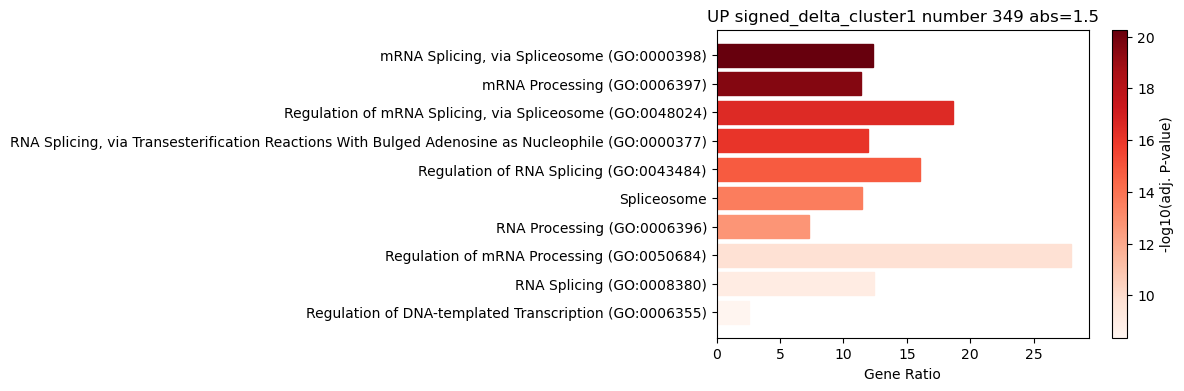

In [10]:
plot_ORA(up_down_symbols, cluster_column, upordown, abs_point)

In [11]:
up_down_symbols, cluster_column, upordown, abs_point = up_down_genes(df_df_rna, "UP", "signed_delta_cluster2", 0)

クラスタ signed_delta_cluster2 UP 遺伝子数: 118
gene_id
シンボル化後 件数: 118


ora.results.head()                      Gene_set  \
0  GO_Biological_Process_2025   
1  GO_Biological_Process_2025   
2  GO_Biological_Process_2025   
3  GO_Biological_Process_2025   
4  GO_Biological_Process_2025   

                                                Term Overlap   P-value  \
0                  Glycolipid Transport (GO:0046836)     1/5  0.028668   
1  Glycerol-3-Phosphate Metabolic Process (GO:000...     1/6  0.034303   
2                        NADH Oxidation (GO:0006116)    1/12  0.067440   
3                    Ceramide Transport (GO:0035627)    1/15  0.083583   
4                 NAD Metabolic Process (GO:0019674)    1/18  0.099449   

   Adjusted P-value  Old P-value  Old Adjusted P-value  Odds Ratio  \
0          0.497398            0                     0   43.217391   
1          0.497398            0                     0   34.572174   
2          0.576803            0                     0   15.709881   
3          0.576803            0                     0   

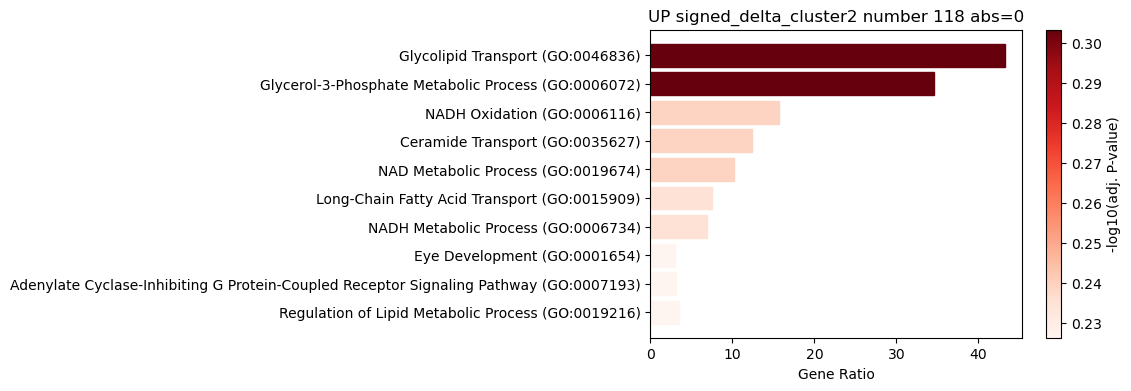

In [12]:
plot_ORA(up_down_symbols, cluster_column, upordown, abs_point)

## DOWN

In [13]:
up_down_symbols, cluster_column, upordown, abs_point = up_down_genes(df_df_rna, "DOWN", "signed_delta_cluster1", 0)

クラスタ signed_delta_cluster1 DOWN 遺伝子数: 118
gene_id
シンボル化後 件数: 118


ora.results.head()                      Gene_set  \
0  GO_Biological_Process_2025   
1  GO_Biological_Process_2025   
2  GO_Biological_Process_2025   
3  GO_Biological_Process_2025   
4  GO_Biological_Process_2025   

                                                Term Overlap   P-value  \
0                  Glycolipid Transport (GO:0046836)     1/5  0.028668   
1  Glycerol-3-Phosphate Metabolic Process (GO:000...     1/6  0.034303   
2                        NADH Oxidation (GO:0006116)    1/12  0.067440   
3                    Ceramide Transport (GO:0035627)    1/15  0.083583   
4                 NAD Metabolic Process (GO:0019674)    1/18  0.099449   

   Adjusted P-value  Old P-value  Old Adjusted P-value  Odds Ratio  \
0          0.497398            0                     0   43.217391   
1          0.497398            0                     0   34.572174   
2          0.576803            0                     0   15.709881   
3          0.576803            0                     0   

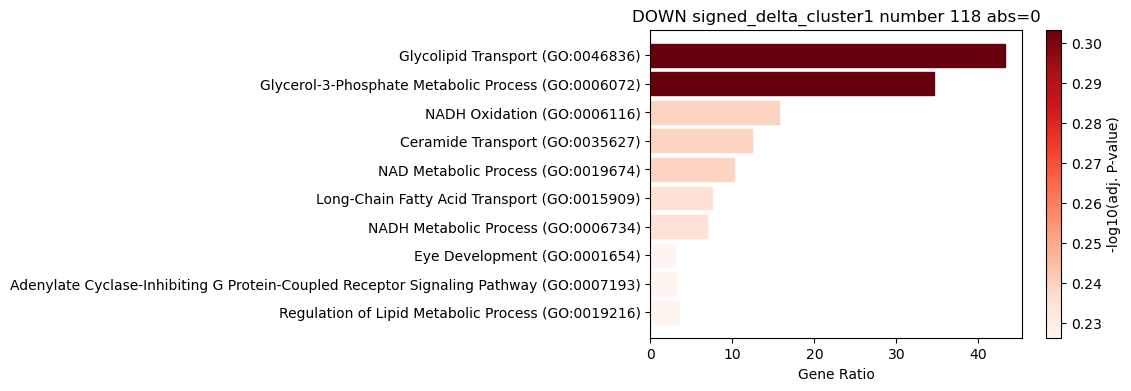

In [14]:
plot_ORA(up_down_symbols, cluster_column, upordown, abs_point)

In [15]:
up_down_symbols, cluster_column, upordown, abs_point = up_down_genes(df_df_rna, "DOWN", "signed_delta_cluster2", 1.5)

クラスタ signed_delta_cluster2 DOWN 遺伝子数: 350
gene_id
シンボル化後 件数: 349


ora.results.head()                      Gene_set  \
0  GO_Biological_Process_2025   
1  GO_Biological_Process_2025   
2  GO_Biological_Process_2025   
3  GO_Biological_Process_2025   
4  GO_Biological_Process_2025   

                                                Term Overlap       P-value  \
0        mRNA Splicing, via Spliceosome (GO:0000398)  35/211  3.678755e-24   
1                       mRNA Processing (GO:0006397)  35/226  3.977704e-23   
2  Regulation of mRNA Splicing, via Spliceosome (...   23/97  6.147831e-20   
3  RNA Splicing, via Transesterification Reaction...  28/171  2.214297e-19   
4            Regulation of RNA Splicing (GO:0043484)  22/104  5.666202e-18   

   Adjusted P-value  Old P-value  Old Adjusted P-value  Odds Ratio  \
0      5.396734e-21            0                     0   12.333979   
1      2.917646e-20            0                     0   11.356588   
2      3.006290e-17            0                     0   18.664857   
3      8.120935e-17            0 

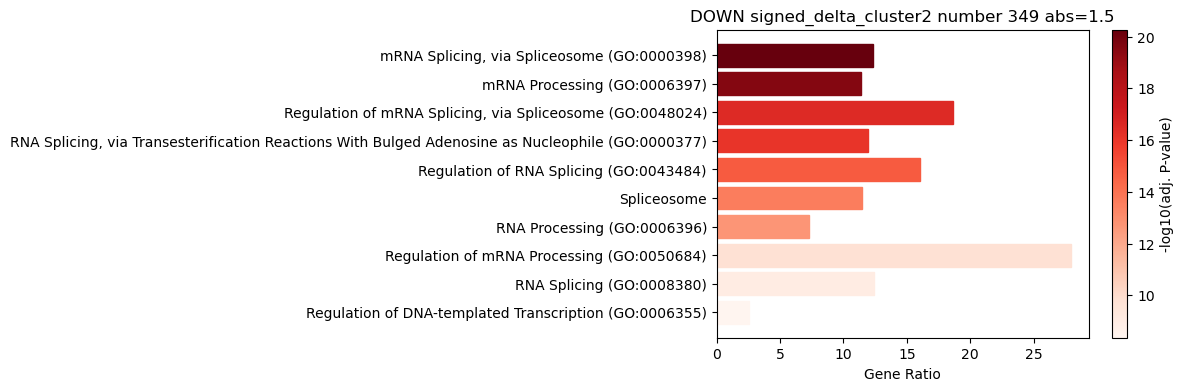

In [16]:
plot_ORA(up_down_symbols, cluster_column, upordown, abs_point)

| クラスター    | UP/DOWN | 遺伝子数 | abs(ΔZ)閾値 | 主な富化パスウェイ                                                 |
| -------- | ------- | ---- | --------- | --------------------------------------------------------- |
| Cluster1 | UP      | 349  | 1.5       | mRNA Splicing, Spliceosome, Regulation of mRNA Processing |
| Cluster1 | DOWN    | 118  | 0.0       | Glycolipid Transport, Glycerol-3-Phosphate Metabolism     |
| Cluster2 | UP      | 118  | 0.0       | Glycolipid Transport, Glycerol-3-Phosphate Metabolism     |
| Cluster2 | DOWN    | 349  | 1.5       | mRNA Splicing, Spliceosome, Regulation of RNA Processing  |


# METH

- RNA で得た「Cluster 1／Cluster 2」というサンプルラベルを、そのままメチル化データにも適用し、Up signed_ΔZ → ORAを行う

## METHデータを読み込みindexをgeneに変更する

In [17]:
meth_z = pd.read_csv("data/METH_z.csv", index_col="probe")
meth_z

,TCGA-05-4384,TCGA-05-4390,TCGA-05-4396,TCGA-05-4405,TCGA-05-4410,TCGA-05-4415,TCGA-05-4417,TCGA-05-4424,TCGA-05-4425,TCGA-05-4427,...,TCGA-NJ-A4YG,TCGA-NJ-A4YI,TCGA-NJ-A4YP,TCGA-NJ-A4YQ,TCGA-NJ-A55A,TCGA-NJ-A55O,TCGA-NJ-A55R,TCGA-NJ-A7XG,TCGA-O1-A52J,TCGA-S2-AA1A
probe,,,,,,,,,,,,,,,,,,,,,
cg00000108,1.534670,1.327045,-2.136845,-2.263472,0.911715,-0.201222,0.561253,0.842447,-0.169177,-0.638064,...,1.231472,-1.770710,-0.770590,-1.646046,-1.466780,0.107001,-2.974684,-0.798613,-0.872685,-0.468340
cg00000236,0.127683,-0.964268,-0.470278,-0.767887,-0.233932,0.276157,0.472653,-0.070897,-0.347290,0.658324,...,0.704767,-0.016415,-1.814073,-1.759218,-1.818347,-0.743865,-1.565137,1.008444,-1.698703,1.256178
cg00000292,0.240547,0.264449,-0.052603,0.146314,-0.131057,0.121643,0.344662,0.248131,-2.001254,0.529529,...,0.388638,1.075799,-0.835363,0.471216,-0.862138,0.072087,-0.567863,0.976717,0.921864,0.634461
cg00000321,0.431038,-0.763095,-1.867543,1.180180,0.623837,-0.255886,-0.196371,0.888271,1.112629,-0.242429,...,-0.380532,1.543720,-0.401685,0.422771,-0.343169,-1.540225,-0.473654,1.099459,-0.847297,-0.105373
cg00000363,-1.459913,0.524220,-0.430149,2.369963,1.728751,0.317861,-0.370230,-0.599806,0.794552,1.689103,...,1.138744,3.887095,1.207232,2.048813,0.494416,0.789600,1.784501,-1.488955,-0.943501,-0.008859
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ctl_70700334,-0.917815,0.111983,0.228885,-0.803867,0.251619,0.439417,-0.173131,-1.942209,-0.494866,-0.015122,...,0.493058,0.450567,1.621907,1.081922,1.375987,1.251426,1.387788,0.587204,2.801452,2.038904
ctl_71670310,0.140408,0.413842,-0.917790,-0.004748,-0.180053,-0.468088,0.519718,-0.342610,-0.621718,0.153689,...,0.043346,-0.667575,-1.656435,-1.529450,-0.797656,-1.735187,-1.563160,1.141446,-0.990793,0.386390
ctl_71718498,-0.142241,0.093301,0.004328,-0.457928,0.666604,-0.032562,0.708184,0.591576,0.440538,0.435860,...,-0.276255,-0.873013,-0.606512,-1.254306,-1.516023,-0.684001,-1.281492,-1.137221,-0.850888,-0.913837


In [18]:
rna_labels = rna_km.labels_  # 長さ＝サンプル数の配列
samples = rna_z.columns.tolist()
# サンプル名 → クラスタ番号 の辞書
sample2cluster = dict(zip(samples, rna_labels))
sample2cluster

{'TCGA-05-4384': 1,
 'TCGA-05-4390': 1,
 'TCGA-05-4396': 1,
 'TCGA-05-4405': 1,
 'TCGA-05-4410': 1,
 'TCGA-05-4415': 1,
 'TCGA-05-4417': 1,
 'TCGA-05-4424': 1,
 'TCGA-05-4425': 1,
 'TCGA-05-4427': 1,
 'TCGA-05-4433': 1,
 'TCGA-05-5420': 1,
 'TCGA-05-5423': 1,
 'TCGA-05-5425': 1,
 'TCGA-05-5428': 1,
 'TCGA-05-5429': 1,
 'TCGA-05-5715': 1,
 'TCGA-35-5375': 1,
 'TCGA-38-4632': 1,
 'TCGA-38-4632.1': 1,
 'TCGA-38-6178': 1,
 'TCGA-38-7271': 1,
 'TCGA-38-A44F': 1,
 'TCGA-44-2655': 0,
 'TCGA-44-2655.1': 0,
 'TCGA-44-2656': 1,
 'TCGA-44-2656.1': 0,
 'TCGA-44-2656.2': 0,
 'TCGA-44-2659': 0,
 'TCGA-44-2662': 1,
 'TCGA-44-2662.1': 1,
 'TCGA-44-2662.2': 0,
 'TCGA-44-2662.3': 1,
 'TCGA-44-2665': 1,
 'TCGA-44-2665.1': 0,
 'TCGA-44-2665.2': 1,
 'TCGA-44-2665.3': 1,
 'TCGA-44-2666': 0,
 'TCGA-44-2666.1': 1,
 'TCGA-44-2666.2': 1,
 'TCGA-44-2668': 1,
 'TCGA-44-2668.1': 1,
 'TCGA-44-2668.2': 0,
 'TCGA-44-2668.3': 1,
 'TCGA-44-3917': 1,
 'TCGA-44-3917.1': 1,
 'TCGA-44-3918': 1,
 'TCGA-44-3918.1': 0,
 'TCGA

In [19]:
anno = pd.read_csv("dataset/humanmethylation450_15017482_v1-2.csv", dtype=str, skiprows=7, usecols=["IlmnID","UCSC_RefGene_Name"])
anno

,IlmnID,UCSC_RefGene_Name
0,cg00035864,TTTY18
1,cg00050873,TSPY4;FAM197Y2
2,cg00061679,DAZ1;DAZ4;DAZ4
3,cg00063477,EIF1AY
4,cg00121626,BCORL2
...,...,...
486423,65622344,NaN
486424,57640346,NaN
486425,47715450,NaN
486426,28673402,NaN


In [20]:
def pick_first(x):
    # NaN や None の場合は None を返す
    if pd.isna(x):
        return None
    # 文字列であれば ; で分割し、先頭要素（空文字は None）
    parts = str(x).split(";")
    return parts[0] if parts[0] != "" else None

In [21]:
anno["gene"] = anno["UCSC_RefGene_Name"].apply(pick_first)
anno

,IlmnID,UCSC_RefGene_Name,gene
0,cg00035864,TTTY18,TTTY18
1,cg00050873,TSPY4;FAM197Y2,TSPY4
2,cg00061679,DAZ1;DAZ4;DAZ4,DAZ1
3,cg00063477,EIF1AY,EIF1AY
4,cg00121626,BCORL2,BCORL2
...,...,...,...
486423,65622344,NaN,None
486424,57640346,NaN,None
486425,47715450,NaN,None
486426,28673402,NaN,None


In [22]:
probe2gene = anno.set_index("IlmnID")["gene"].to_dict()
probe2gene

{'cg00035864': 'TTTY18',
 'cg00050873': 'TSPY4',
 'cg00061679': 'DAZ1',
 'cg00063477': 'EIF1AY',
 'cg00121626': 'BCORL2',
 'cg00212031': 'TTTY14',
 'cg00213748': None,
 'cg00214611': 'TMSB4Y',
 'cg00223952': 'PCDH11Y',
 'cg00243321': None,
 'cg00271873': None,
 'cg00272582': 'ZFY',
 'cg00308367': 'KDM5D',
 'cg00311963': 'LOC100101121',
 'cg00335297': 'RBMY1F',
 'cg00455876': None,
 'cg00479827': 'NCRNA00185',
 'cg00543493': 'TSPY4',
 'cg00576139': 'LOC100101115',
 'cg00599377': None,
 'cg00639218': None,
 'cg00676506': 'RPS4Y2',
 'cg00679624': None,
 'cg00762184': 'TTTY15',
 'cg00789540': None,
 'cg00876332': 'BCORL2',
 'cg00903245': 'TSPY4',
 'cg00975375': None,
 'cg01053349': 'TGIF2LY',
 'cg01061520': None,
 'cg01073572': 'NLGN4Y',
 'cg01086462': None,
 'cg01141334': None,
 'cg01209756': None,
 'cg01215343': None,
 'cg01311227': 'RPS4Y1',
 'cg01375382': 'RPS4Y1',
 'cg01426558': 'DDX3Y',
 'cg01463110': None,
 'cg01498999': 'NLGN4Y',
 'cg01523029': 'TSPY4',
 'cg01644972': 'EIF1AY',
 'c

In [23]:
meth_z["gene"] = meth_z.index.map(probe2gene)
meth_z

,TCGA-05-4384,TCGA-05-4390,TCGA-05-4396,TCGA-05-4405,TCGA-05-4410,TCGA-05-4415,TCGA-05-4417,TCGA-05-4424,TCGA-05-4425,TCGA-05-4427,...,TCGA-NJ-A4YI,TCGA-NJ-A4YP,TCGA-NJ-A4YQ,TCGA-NJ-A55A,TCGA-NJ-A55O,TCGA-NJ-A55R,TCGA-NJ-A7XG,TCGA-O1-A52J,TCGA-S2-AA1A,gene
probe,,,,,,,,,,,,,,,,,,,,,
cg00000108,1.534670,1.327045,-2.136845,-2.263472,0.911715,-0.201222,0.561253,0.842447,-0.169177,-0.638064,...,-1.770710,-0.770590,-1.646046,-1.466780,0.107001,-2.974684,-0.798613,-0.872685,-0.468340,C3orf35
cg00000236,0.127683,-0.964268,-0.470278,-0.767887,-0.233932,0.276157,0.472653,-0.070897,-0.347290,0.658324,...,-0.016415,-1.814073,-1.759218,-1.818347,-0.743865,-1.565137,1.008444,-1.698703,1.256178,VDAC3
cg00000292,0.240547,0.264449,-0.052603,0.146314,-0.131057,0.121643,0.344662,0.248131,-2.001254,0.529529,...,1.075799,-0.835363,0.471216,-0.862138,0.072087,-0.567863,0.976717,0.921864,0.634461,ATP2A1
cg00000321,0.431038,-0.763095,-1.867543,1.180180,0.623837,-0.255886,-0.196371,0.888271,1.112629,-0.242429,...,1.543720,-0.401685,0.422771,-0.343169,-1.540225,-0.473654,1.099459,-0.847297,-0.105373,SFRP1
cg00000363,-1.459913,0.524220,-0.430149,2.369963,1.728751,0.317861,-0.370230,-0.599806,0.794552,1.689103,...,3.887095,1.207232,2.048813,0.494416,0.789600,1.784501,-1.488955,-0.943501,-0.008859,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ctl_70700334,-0.917815,0.111983,0.228885,-0.803867,0.251619,0.439417,-0.173131,-1.942209,-0.494866,-0.015122,...,0.450567,1.621907,1.081922,1.375987,1.251426,1.387788,0.587204,2.801452,2.038904,NaN
ctl_71670310,0.140408,0.413842,-0.917790,-0.004748,-0.180053,-0.468088,0.519718,-0.342610,-0.621718,0.153689,...,-0.667575,-1.656435,-1.529450,-0.797656,-1.735187,-1.563160,1.141446,-0.990793,0.386390,NaN
ctl_71718498,-0.142241,0.093301,0.004328,-0.457928,0.666604,-0.032562,0.708184,0.591576,0.440538,0.435860,...,-0.873013,-0.606512,-1.254306,-1.516023,-0.684001,-1.281492,-1.137221,-0.850888,-0.913837,NaN


In [24]:
meth_z = meth_z.dropna(subset=["gene"])
meth_z

,TCGA-05-4384,TCGA-05-4390,TCGA-05-4396,TCGA-05-4405,TCGA-05-4410,TCGA-05-4415,TCGA-05-4417,TCGA-05-4424,TCGA-05-4425,TCGA-05-4427,...,TCGA-NJ-A4YI,TCGA-NJ-A4YP,TCGA-NJ-A4YQ,TCGA-NJ-A55A,TCGA-NJ-A55O,TCGA-NJ-A55R,TCGA-NJ-A7XG,TCGA-O1-A52J,TCGA-S2-AA1A,gene
probe,,,,,,,,,,,,,,,,,,,,,
cg00000108,1.534670,1.327045,-2.136845,-2.263472,0.911715,-0.201222,0.561253,0.842447,-0.169177,-0.638064,...,-1.770710,-0.770590,-1.646046,-1.466780,0.107001,-2.974684,-0.798613,-0.872685,-0.468340,C3orf35
cg00000236,0.127683,-0.964268,-0.470278,-0.767887,-0.233932,0.276157,0.472653,-0.070897,-0.347290,0.658324,...,-0.016415,-1.814073,-1.759218,-1.818347,-0.743865,-1.565137,1.008444,-1.698703,1.256178,VDAC3
cg00000292,0.240547,0.264449,-0.052603,0.146314,-0.131057,0.121643,0.344662,0.248131,-2.001254,0.529529,...,1.075799,-0.835363,0.471216,-0.862138,0.072087,-0.567863,0.976717,0.921864,0.634461,ATP2A1
cg00000321,0.431038,-0.763095,-1.867543,1.180180,0.623837,-0.255886,-0.196371,0.888271,1.112629,-0.242429,...,1.543720,-0.401685,0.422771,-0.343169,-1.540225,-0.473654,1.099459,-0.847297,-0.105373,SFRP1
cg00000622,1.035815,0.607267,1.366942,1.287183,-0.981979,-1.499160,-0.620863,-0.156142,-0.051188,0.122707,...,0.417497,-0.070164,0.383362,0.004358,0.600000,-0.049386,-0.829658,0.042198,-0.756521,NIPA2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ch.X.1023208F,1.120651,0.374451,0.593012,-0.672655,-0.943309,0.160096,-0.385966,-0.348730,0.126066,0.352621,...,0.745784,2.973241,0.918805,1.062488,-0.212891,1.830863,-0.747024,-1.500576,-1.022867,OPHN1
ch.X.147603R,-1.548342,-1.703178,0.342816,-0.538484,-0.098292,0.269604,-0.903666,-0.507718,-0.559896,-1.410762,...,1.544258,3.974314,0.923986,1.509263,0.726051,1.708099,0.677867,-1.151761,-0.761472,WWC3
ch.X.652438R,-0.953555,-0.890256,0.042459,1.603110,-0.538379,-0.756813,-0.726965,-0.888104,-0.255494,-0.065686,...,1.362075,0.589920,-0.498187,0.558752,0.276660,0.888690,0.059962,1.811636,0.585158,MED14


In [25]:
meth_z = meth_z.groupby("gene").mean()
meth_z

,TCGA-05-4384,TCGA-05-4390,TCGA-05-4396,TCGA-05-4405,TCGA-05-4410,TCGA-05-4415,TCGA-05-4417,TCGA-05-4424,TCGA-05-4425,TCGA-05-4427,...,TCGA-NJ-A4YG,TCGA-NJ-A4YI,TCGA-NJ-A4YP,TCGA-NJ-A4YQ,TCGA-NJ-A55A,TCGA-NJ-A55O,TCGA-NJ-A55R,TCGA-NJ-A7XG,TCGA-O1-A52J,TCGA-S2-AA1A
gene,,,,,,,,,,,,,,,,,,,,,
A1BG,-0.392700,0.548688,0.577240,1.457782,-0.324724,-0.310050,0.435152,-0.407637,1.398544,-0.066552,...,-0.407672,-0.052409,0.613284,-0.417272,0.310223,-0.504186,-0.346581,-0.201030,0.334321,-0.704704
A2BP1,-0.361032,0.360526,-1.175109,0.825998,0.573123,-0.125061,0.632303,-0.936195,1.049026,-0.942647,...,0.514038,0.398914,0.107628,0.210779,0.421370,-0.267107,-0.761145,0.503309,-1.090360,0.607476
A2LD1,-0.086778,-0.198579,-0.671916,0.254312,-0.277780,0.704528,0.303408,0.038395,-0.395038,-0.367672,...,-0.168404,-0.271319,-0.246939,0.644833,-0.419343,-0.140753,-0.143466,-0.620387,-0.008348,0.102636
A2M,-0.880279,-0.079645,0.132996,0.036813,0.188755,0.276714,0.341487,-0.884335,1.230192,-2.116823,...,0.264963,-1.847696,0.827697,-0.573360,0.135966,0.503376,-0.764880,0.516354,-1.473420,0.347683
A2ML1,-0.355082,-0.139141,-1.623756,0.412629,-0.569077,-0.087162,-0.317442,-0.564066,0.290387,-0.024453,...,0.568229,-0.068697,-0.395587,-0.042191,0.011813,0.198472,-1.304927,-0.521902,0.123377,0.499446
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZYX,-0.358475,-0.112397,0.192729,0.476960,0.288139,0.461704,0.152271,-0.016566,-0.787875,-0.043520,...,-0.499557,-0.107176,-0.289304,0.164890,-0.232852,-0.358799,-0.334511,-0.090052,-0.229347,-0.202607
ZZEF1,0.019597,0.025326,0.011490,-0.297422,-0.209163,0.372127,-0.424558,-0.028422,0.104730,0.315436,...,-0.164923,-0.076499,-0.080840,-0.186572,-0.373233,-0.365575,-1.206903,-0.103997,0.172961,-0.059512
ZZZ3,-0.011800,-0.009927,0.027555,0.021373,-0.345673,-0.032342,-0.171491,-0.217798,-0.299436,-0.457439,...,-0.124081,0.164310,0.210341,0.560908,0.146740,-0.014559,0.286610,-0.531060,0.545364,-0.447092


In [26]:
cnv_z = pd.read_csv("data/CNV_z.csv")
cnv_z.rename(columns={"index": "gene_id"}, inplace=True)
cnv_z.set_index("gene_id", inplace=True)
cnv_z

,TCGA-05-4384,TCGA-05-4390,TCGA-05-4396,TCGA-05-4405,TCGA-05-4410,TCGA-05-4415,TCGA-05-4417,TCGA-05-4424,TCGA-05-4425,TCGA-05-4427,...,TCGA-NJ-A4YG,TCGA-NJ-A4YI,TCGA-NJ-A4YP,TCGA-NJ-A4YQ,TCGA-NJ-A55A,TCGA-NJ-A55O,TCGA-NJ-A55R,TCGA-NJ-A7XG,TCGA-O1-A52J,TCGA-S2-AA1A
gene_id,,,,,,,,,,,,,,,,,,,,,
ENSG00000240361.2,-0.715725,0.097833,-1.529283,0.911391,1.724949,0.097833,-0.715725,0.097833,-0.715725,1.724949,...,-0.715725,1.724949,-0.715725,-0.715725,-0.715725,-0.715725,-0.715725,0.097833,0.911391,0.911391
ENSG00000186092.6,-0.715725,0.097833,-1.529283,0.911391,1.724949,0.097833,-0.715725,0.097833,-0.715725,1.724949,...,-0.715725,1.724949,-0.715725,-0.715725,-0.715725,-0.715725,-0.715725,0.097833,0.911391,0.911391
ENSG00000238009.6,-0.715725,0.097833,-1.529283,0.911391,1.724949,0.097833,-0.715725,0.097833,-0.715725,1.724949,...,-0.715725,1.724949,-0.715725,-0.715725,-0.715725,-0.715725,-0.715725,0.097833,0.911391,0.911391
ENSG00000239945.1,-0.715725,0.097833,-1.529283,0.911391,1.724949,0.097833,-0.715725,0.097833,-0.715725,1.724949,...,-0.715725,1.724949,-0.715725,-0.715725,-0.715725,-0.715725,-0.715725,0.097833,0.911391,0.911391
ENSG00000233750.3,-0.715725,0.097833,-1.529283,0.911391,1.724949,0.097833,-0.715725,0.097833,-0.715725,1.724949,...,-0.715725,1.724949,-0.715725,-0.715725,-0.715725,-0.715725,-0.715725,0.097833,0.911391,0.911391
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ENSG00000215506.5,0.609804,-0.565185,1.197299,-0.565185,0.609804,1.784794,-0.565185,0.022310,-0.565185,-0.565185,...,0.609804,-0.565185,0.609804,-0.565185,-0.565185,-0.565185,0.022310,0.609804,-0.565185,-0.565185
ENSG00000224240.1,0.609804,-0.565185,1.197299,-0.565185,0.609804,1.784794,-0.565185,0.022310,-0.565185,-0.565185,...,0.609804,-0.565185,0.609804,-0.565185,-0.565185,-0.565185,0.022310,0.609804,-0.565185,-0.565185
ENSG00000227629.1,0.609804,-0.565185,1.197299,-0.565185,0.609804,1.784794,-0.565185,0.022310,-0.565185,-0.565185,...,0.609804,-0.565185,0.609804,-0.565185,-0.565185,-0.565185,0.022310,0.609804,-0.565185,-0.565185


In [27]:
common = set(rna_z.columns) & set(meth_z.columns) & set(cnv_z.columns)
print("共通サンプル数:", len(common))

共通サンプル数: 463


In [28]:
common = sorted(common)
meth_z = meth_z[common]
cnv_z = cnv_z[common]

In [38]:
# サンプル→クラスタが分かる Series を作る
sample_clusters = pd.Series(
    [ sample2cluster[s] for s in meth_z.columns ],
    index=meth_z.columns
)

In [39]:
sample_clusters

TCGA-05-4384    1
TCGA-05-4390    1
TCGA-05-4396    1
TCGA-05-4405    1
TCGA-05-4410    1
               ..
TCGA-NJ-A55O    1
TCGA-NJ-A55R    0
TCGA-NJ-A7XG    1
TCGA-O1-A52J    1
TCGA-S2-AA1A    1
Length: 463, dtype: int32

In [44]:
clusters = []
cluster0_samples = sample_clusters[sample_clusters==0].index
cluster1_samples = sample_clusters[sample_clusters==1].index
clusters.append(cluster0_samples)
clusters.append(cluster1_samples)
clusters

[Index(['TCGA-44-2655', 'TCGA-44-2656.1', 'TCGA-44-2656.2', 'TCGA-44-2659',
        'TCGA-44-2665.1', 'TCGA-44-2666', 'TCGA-44-2668.2', 'TCGA-44-3918.1',
        'TCGA-44-4112.1', 'TCGA-44-7660',
        ...
        'TCGA-L9-A50W', 'TCGA-L9-A7SV', 'TCGA-L9-A8F4', 'TCGA-MN-A4N1',
        'TCGA-MN-A4N5', 'TCGA-MP-A4SV', 'TCGA-MP-A4T6', 'TCGA-MP-A5C7',
        'TCGA-NJ-A4YP', 'TCGA-NJ-A55R'],
       dtype='object', length=138),
 Index(['TCGA-05-4384', 'TCGA-05-4390', 'TCGA-05-4396', 'TCGA-05-4405',
        'TCGA-05-4410', 'TCGA-05-4415', 'TCGA-05-4417', 'TCGA-05-4424',
        'TCGA-05-4425', 'TCGA-05-4427',
        ...
        'TCGA-MP-A4TJ', 'TCGA-MP-A4TK', 'TCGA-NJ-A4YG', 'TCGA-NJ-A4YI',
        'TCGA-NJ-A4YQ', 'TCGA-NJ-A55A', 'TCGA-NJ-A55O', 'TCGA-NJ-A7XG',
        'TCGA-O1-A52J', 'TCGA-S2-AA1A'],
       dtype='object', length=325)]

## UP

- rnaのクラスター分けの情報を使用する

In [45]:
df_de_meth, _, _, _ = cluster_makedf(
    K=2,
    arr=METH,
    df_z=meth_z,
    sample_clusters=sample_clusters,
    clusters=clusters
)

df_de:
             pvalue    qvalue  reject_H0  cluster0_mean  cluster1_mean  \
gene                                                                     
A1BG       0.481051  0.764683      False      -0.005153       0.038283   
A2BP1      0.000461  0.041458       True      -0.148348       0.069340   
A2LD1      0.054851  0.297447      False      -0.093459       0.033675   
A2M        0.335255  0.661025      False      -0.049062       0.029528   
A2ML1      0.121675  0.418639      False      -0.072713       0.033600   
...             ...       ...        ...            ...            ...   
ZYX        0.829537  0.936212      False      -0.005965       0.004706   
ZZEF1      0.210187  0.540034      False       0.037535      -0.002880   
ZZZ3       0.325759  0.654021      False       0.033148      -0.016727   
psiTPTE22  0.949821  0.982223      False       0.043496       0.037193   
tAKR       0.039227  0.251542      False       0.171627      -0.039025   

           max_mean  min_mean 

In [54]:
up_down_symbols, cluster_column, upordown, abs_point= up_down_genes(df_de_meth, "UP", "signed_delta_cluster1", 0.1)


クラスタ signed_delta_cluster1 UP 遺伝子数: 36
gene
シンボル化後 件数: 36


ora.results.head()                      Gene_set  \
0  GO_Biological_Process_2025   
1  GO_Biological_Process_2025   
2  GO_Biological_Process_2025   
3  GO_Biological_Process_2025   
4  GO_Biological_Process_2025   

                                                Term Overlap   P-value  \
0       Peptidyl-Lysine Monomethylation (GO:0018026)     1/6  0.010753   
1  Regulation of Superoxide Metabolic Process (GO...     1/6  0.010753   
2  Negative Regulation of Membrane Protein Ectodo...     1/6  0.010753   
3  Clathrin-Coated Vesicle Cargo Loading (GO:0035...     1/6  0.010753   
4  Clathrin-Coated Vesicle Cargo Loading, AP-3-me...     1/6  0.010753   

   Adjusted P-value  Old P-value  Old Adjusted P-value  Odds Ratio  \
0          0.185963            0                     0  114.051429   
1          0.185963            0                     0  114.051429   
2          0.185963            0                     0  114.051429   
3          0.185963            0                     0  1

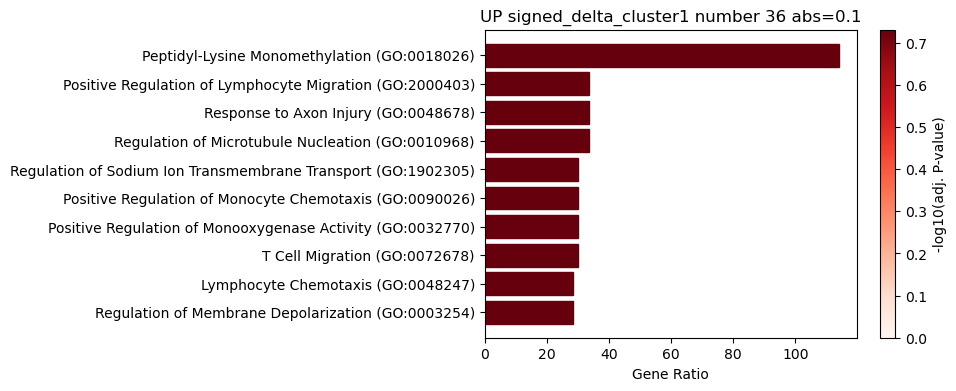

In [55]:
plot_ORA(up_down_symbols, cluster_column, upordown, abs_point)

In [57]:
up_down_symbols, cluster_column, upordown, abs_point = up_down_genes(df_de_meth, "UP", "signed_delta_cluster2", 0.1)

クラスタ signed_delta_cluster2 UP 遺伝子数: 317
gene
シンボル化後 件数: 317


ora.results.head()                      Gene_set  \
0  GO_Biological_Process_2025   
1  GO_Biological_Process_2025   
2  GO_Biological_Process_2025   
3  GO_Biological_Process_2025   
4  GO_Biological_Process_2025   

                                                Term Overlap       P-value  \
0  Detection of Chemical Stimulus Involved in Sen...  20/132  2.579868e-14   
1  Detection of Chemical Stimulus Involved in Sen...  20/135  4.014293e-14   
2           Sensory Perception of Smell (GO:0007608)  24/214  6.328423e-14   
3  Sensory Perception of Chemical Stimulus (GO:00...   7/100  1.069520e-03   
4  Positive Regulation of T-helper 2 Cell Differe...     2/5  2.426410e-03   

   Adjusted P-value  Old P-value  Old Adjusted P-value  Odds Ratio  \
0      2.139618e-11            0                     0   11.767076   
1      2.139618e-11            0                     0   11.458352   
2      2.248700e-11            0                     0    8.403664   
3      2.850272e-01            0 

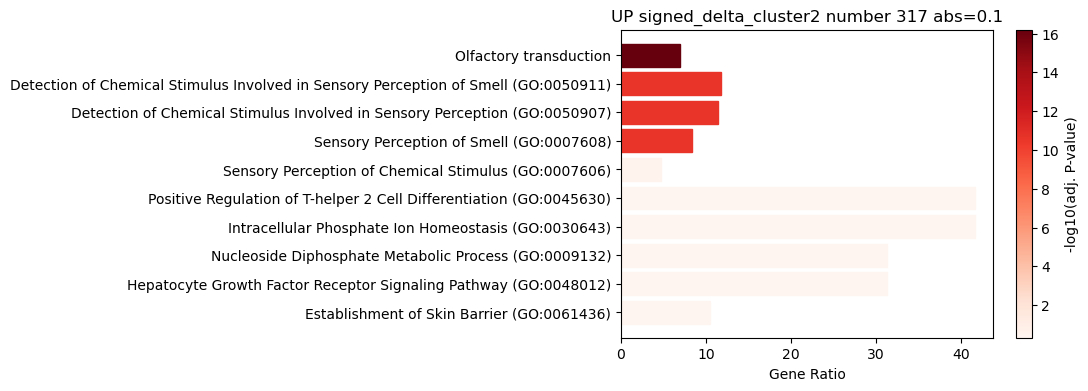

In [58]:
plot_ORA(up_down_symbols, cluster_column, upordown, abs_point)

## DOWN

In [ ]:
up_down_symbols, cluster_column, upordown, abs_point = up_down_genes(df_de_meth, "DOWN", "signed_delta_cluster1", 1)

クラスタ signed_delta_cluster1 DOWN 遺伝子数: 546
gene
シンボル化後 件数: 546


ora.results.head()                      Gene_set  \
0  GO_Biological_Process_2025   
1  GO_Biological_Process_2025   
2  GO_Biological_Process_2025   
3  GO_Biological_Process_2025   
4  GO_Biological_Process_2025   

                                                Term Overlap       P-value  \
0           Sensory Perception of Smell (GO:0007608)  40/214  3.495906e-22   
1  Detection of Chemical Stimulus Involved in Sen...  31/132  1.591804e-20   
2  Detection of Chemical Stimulus Involved in Sen...  31/135  3.248515e-20   
3  Sensory Perception of Chemical Stimulus (GO:00...  13/100  3.294041e-06   
4  Defense Response to Gram-negative Bacterium (G...   10/87  1.286171e-04   

   Adjusted P-value  Old P-value  Old Adjusted P-value  Odds Ratio  \
0      3.807041e-19            0                     0    8.759257   
1      8.667372e-18            0                     0   11.534038   
2      1.179211e-17            0                     0   11.199589   
3      8.968026e-04            0 

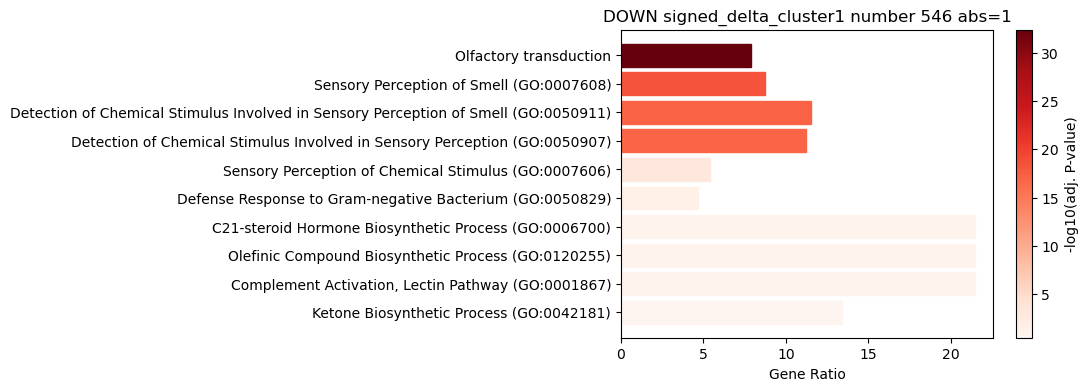

In [ ]:
plot_ORA(up_down_symbols, cluster_column, upordown, abs_point)

In [ ]:
up_down_symbols, cluster_column, upordown, abs_point = up_down_genes(df_de_meth, "DOWN", "signed_delta_cluster2", 0.1)

クラスタ signed_delta_cluster2 DOWN 遺伝子数: 292
gene
シンボル化後 件数: 292


ora.results.head()                      Gene_set  \
0  GO_Biological_Process_2025   
1  GO_Biological_Process_2025   
2  GO_Biological_Process_2025   
3  GO_Biological_Process_2025   
4  GO_Biological_Process_2025   

                                                Term Overlap   P-value  \
0  Adaptive Imm Resp Based on Som Recomb of Imm R...    4/24  0.000376   
1  Positive Regulation of Toll-Like Receptor 4 Si...    3/11  0.000466   
2       Response to Nerve Growth Factor (GO:1990089)    3/13  0.000790   
3  Regulation of Interleukin-6 Production (GO:003...   7/114  0.001432   
4          Lymphocyte Mediated Immunity (GO:0002449)    3/17  0.001800   

   Adjusted P-value  Old P-value  Old Adjusted P-value  Odds Ratio  \
0          0.258698            0                     0   13.672222   
1          0.258698            0                     0   25.562284   
2          0.258698            0                     0   20.447751   
3          0.258698            0                     0   

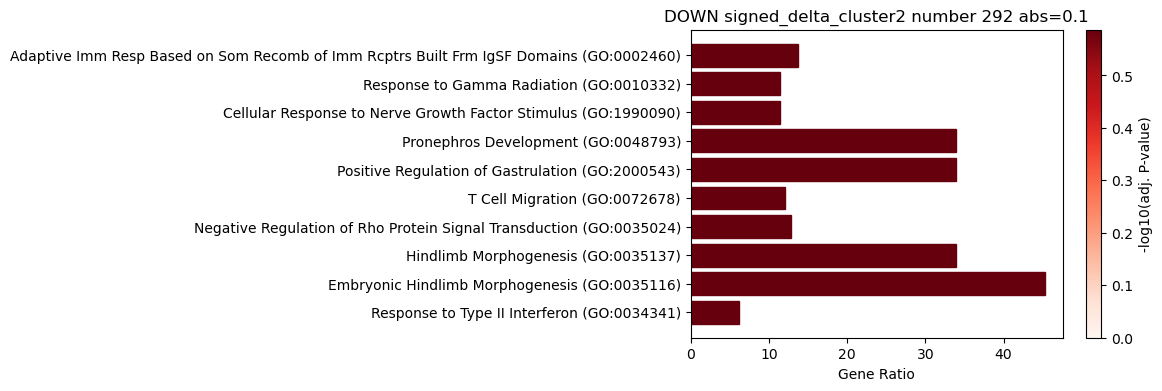

In [ ]:
plot_ORA(up_down_symbols, cluster_column, upordown, abs_point)

# CNV

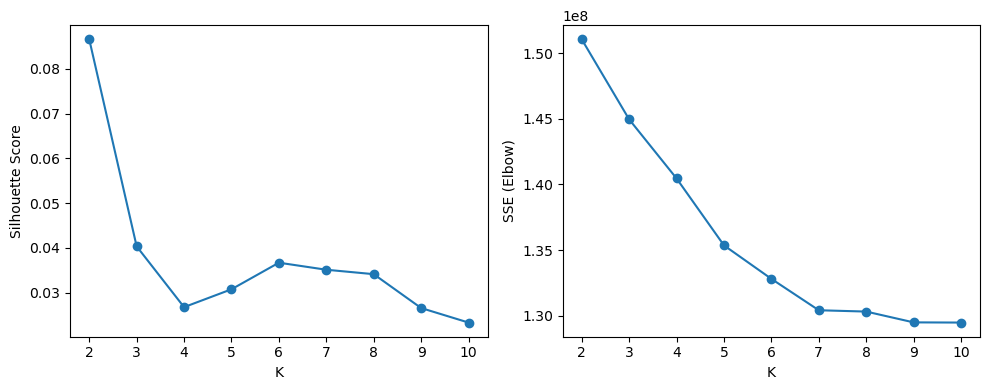

In [ ]:
plot_sil_elbow(CNV)

## UP

In [62]:
cnv_z.head()

,TCGA-05-4384,TCGA-05-4390,TCGA-05-4396,TCGA-05-4405,TCGA-05-4410,TCGA-05-4415,TCGA-05-4417,TCGA-05-4424,TCGA-05-4425,TCGA-05-4427,...,TCGA-NJ-A4YG,TCGA-NJ-A4YI,TCGA-NJ-A4YP,TCGA-NJ-A4YQ,TCGA-NJ-A55A,TCGA-NJ-A55O,TCGA-NJ-A55R,TCGA-NJ-A7XG,TCGA-O1-A52J,TCGA-S2-AA1A
gene_id,,,,,,,,,,,,,,,,,,,,,
ENSG00000240361.2,-0.715725,0.097833,-1.529283,0.911391,1.724949,0.097833,-0.715725,0.097833,-0.715725,1.724949,...,-0.715725,1.724949,-0.715725,-0.715725,-0.715725,-0.715725,-0.715725,0.097833,0.911391,0.911391
ENSG00000186092.6,-0.715725,0.097833,-1.529283,0.911391,1.724949,0.097833,-0.715725,0.097833,-0.715725,1.724949,...,-0.715725,1.724949,-0.715725,-0.715725,-0.715725,-0.715725,-0.715725,0.097833,0.911391,0.911391
ENSG00000238009.6,-0.715725,0.097833,-1.529283,0.911391,1.724949,0.097833,-0.715725,0.097833,-0.715725,1.724949,...,-0.715725,1.724949,-0.715725,-0.715725,-0.715725,-0.715725,-0.715725,0.097833,0.911391,0.911391
ENSG00000239945.1,-0.715725,0.097833,-1.529283,0.911391,1.724949,0.097833,-0.715725,0.097833,-0.715725,1.724949,...,-0.715725,1.724949,-0.715725,-0.715725,-0.715725,-0.715725,-0.715725,0.097833,0.911391,0.911391
ENSG00000233750.3,-0.715725,0.097833,-1.529283,0.911391,1.724949,0.097833,-0.715725,0.097833,-0.715725,1.724949,...,-0.715725,1.724949,-0.715725,-0.715725,-0.715725,-0.715725,-0.715725,0.097833,0.911391,0.911391


In [59]:
df_de_cnv, _, _, _ = cluster_makedf(
    K=2,
    arr=CNV,
    df_z=cnv_z,
    sample_clusters=sample_clusters,
    clusters=clusters
)

df_de:
                     pvalue    qvalue  reject_H0  cluster0_mean  \
gene_id                                                           
ENSG00000240361.2  0.034208  0.136406      False       0.156786   
ENSG00000186092.6  0.034208  0.136406      False       0.156786   
ENSG00000238009.6  0.034208  0.136406      False       0.156786   
ENSG00000239945.1  0.034208  0.136406      False       0.156786   
ENSG00000233750.3  0.034208  0.136406      False       0.156786   
...                     ...       ...        ...            ...   
ENSG00000215506.5  0.146677  0.273660      False       0.107454   
ENSG00000224240.1  0.146677  0.273660      False       0.107454   
ENSG00000227629.1  0.146677  0.273660      False       0.107454   
ENSG00000237917.1  0.146677  0.273660      False       0.107454   
ENSG00000231514.1  0.146677  0.273660      False       0.107454   

                   cluster1_mean  max_mean  min_mean    deltaZ  \
gene_id                                                

In [66]:
df_de_cnv[df_de_cnv["qvalue"] < 0.05]

,pvalue,qvalue,reject_H0,cluster0_mean,cluster1_mean,max_mean,min_mean,deltaZ,signed_delta_cluster1,signed_delta_cluster2
gene_id,,,,,,,,,,


- クラスター間で遺伝子レベルのコピー数に統計的な有意差がほとんどなかった

In [ ]:
up_down_symbols, cluster_column, upordown, abs_point= up_down_genes(df_de_cnv, "UP", "signed_delta_cluster1", 0.0)

クラスタ signed_delta_cluster1 UP 遺伝子数: 0
gene_id
シンボル化後 件数: 0


In [ ]:
# 増幅しやすい遺伝子（効果量ベース）
sig_amp = df_de_cnv['signed_delta_cluster1'] \
            .sort_values(ascending=False) \
            .head(100)
sig_amp

gene_id
ENSG00000163071.11    0.467649
ENSG00000251040.1     0.467649
ENSG00000272576.1     0.447697
ENSG00000243929.1     0.447697
ENSG00000109184.15    0.447697
                        ...   
ENSG00000126067.12    0.381191
ENSG00000239636.1     0.381191
ENSG00000232862.5     0.380620
ENSG00000126070.20    0.380620
ENSG00000271554.1     0.380620
Name: signed_delta_cluster1, Length: 100, dtype: float64

In [70]:
up_down_index = sig_amp.index.tolist()

idx_name = sig_amp.index.name  # インデックス名を取得
if idx_name == "gene_id":
    # ID をシンボルに変換
    up_down_symbols = [emap[gid] for gid in up_down_index if gid in emap]

else:
    up_down_symbols = sig_amp.index.tolist()

print("シンボル化後 件数:", len(up_down_symbols))

シンボル化後 件数: 100


ora.results.head()                      Gene_set  \
0  GO_Biological_Process_2025   
1  GO_Biological_Process_2025   
2  GO_Biological_Process_2025   
3  GO_Biological_Process_2025   
4  GO_Biological_Process_2025   

                                                Term Overlap       P-value  \
0                  pre-miRNA Processing (GO:0031054)    4/13  3.902097e-07   
1                 RISC Complex Assembly (GO:0070922)     3/9  9.670863e-06   
2                      miRNA Processing (GO:0035196)    4/32  1.825900e-05   
3  miRNA-mediated Gene Silencing by mRNA Destabil...     2/7  5.011897e-04   
4  Regulatory ncRNA-mediated Gene Silencing (GO:0...    3/37  8.089760e-04   

   Adjusted P-value  Old P-value  Old Adjusted P-value  Odds Ratio  \
0          0.000107            0                     0   93.061988   
1          0.001320            0                     0  103.619792   
2          0.001662            0                     0   29.884211   
3          0.034206            0 

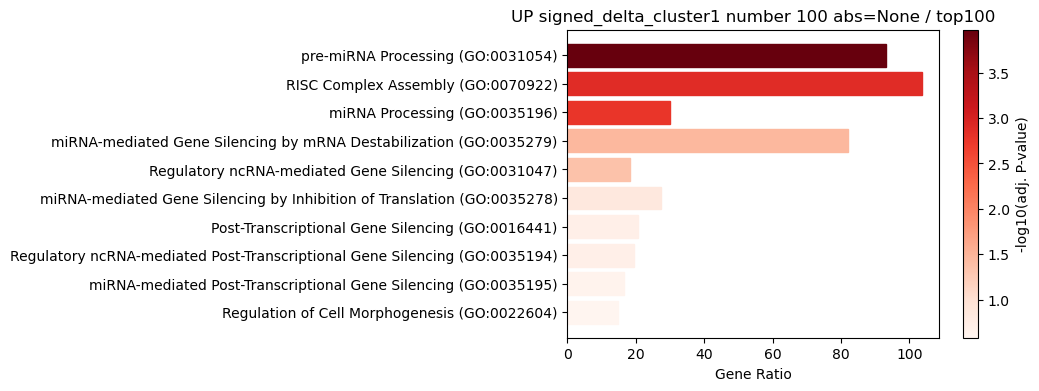

In [72]:
plot_ORA(up_down_symbols, cluster_column, upordown, abs_point="None / top100")

In [73]:
# 増幅しやすい遺伝子（効果量ベース）
sig_amp = df_de_cnv['signed_delta_cluster2'] \
            .sort_values(ascending=False) \
            .head(100)
sig_amp

gene_id
ENSG00000166226.13    0.115533
ENSG00000257336.1     0.115298
ENSG00000264405.1     0.115110
ENSG00000283677.1     0.115110
ENSG00000257289.1     0.114289
                        ...   
ENSG00000118307.20    0.085779
ENSG00000276842.1     0.085689
ENSG00000258449.1     0.085689
ENSG00000283674.3     0.085600
ENSG00000242607.1     0.085600
Name: signed_delta_cluster2, Length: 100, dtype: float64

In [74]:
up_down_index = sig_amp.index.tolist()

idx_name = sig_amp.index.name  # インデックス名を取得
if idx_name == "gene_id":
    # ID をシンボルに変換
    up_down_symbols = [emap[gid] for gid in up_down_index if gid in emap]

else:
    up_down_symbols = sig_amp.index.tolist()

print("シンボル化後 件数:", len(up_down_symbols))

シンボル化後 件数: 100


ora.results.head()                      Gene_set  \
0  GO_Biological_Process_2025   
1  GO_Biological_Process_2025   
2  GO_Biological_Process_2025   
3  GO_Biological_Process_2025   
4  GO_Biological_Process_2025   

                                                Term Overlap   P-value  \
0  Negative Regulation of Striated Muscle Cell Di...    2/17  0.003205   
1  Positive Regulation of Signaling Receptor Acti...    2/19  0.004004   
2  Positive Regulation of Nucleocytoplasmic Trans...    2/46  0.022208   
3              Valine Metabolic Process (GO:0006573)     1/5  0.024754   
4  Regulation of Vitamin D Biosynthetic Process (...     1/5  0.024754   

   Adjusted P-value  Old P-value  Old Adjusted P-value  Odds Ratio  \
0          0.389404            0                     0   27.054422   
1          0.389404            0                     0   23.869148   
2          0.389404            0                     0    9.209647   
3          0.389404            0                     0   

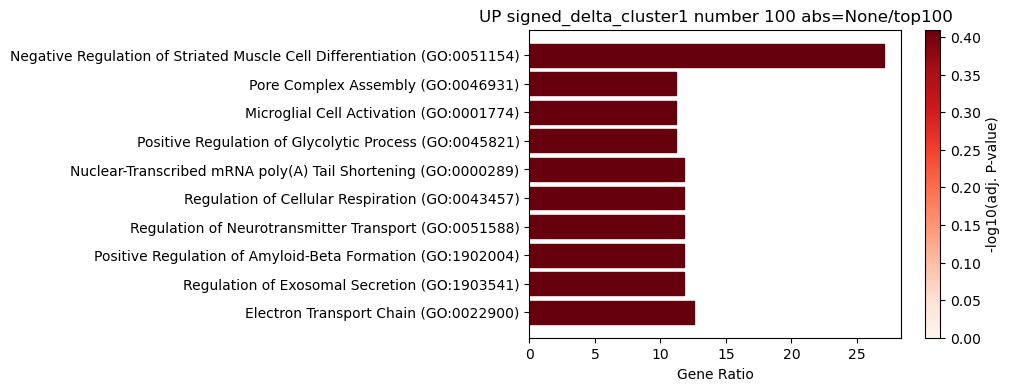

In [75]:
plot_ORA(up_down_symbols, cluster_column, upordown, abs_point="None/top100")